# Spectral Construction

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_maps import *
from quantum_tools import *
from experiments import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## 

C:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


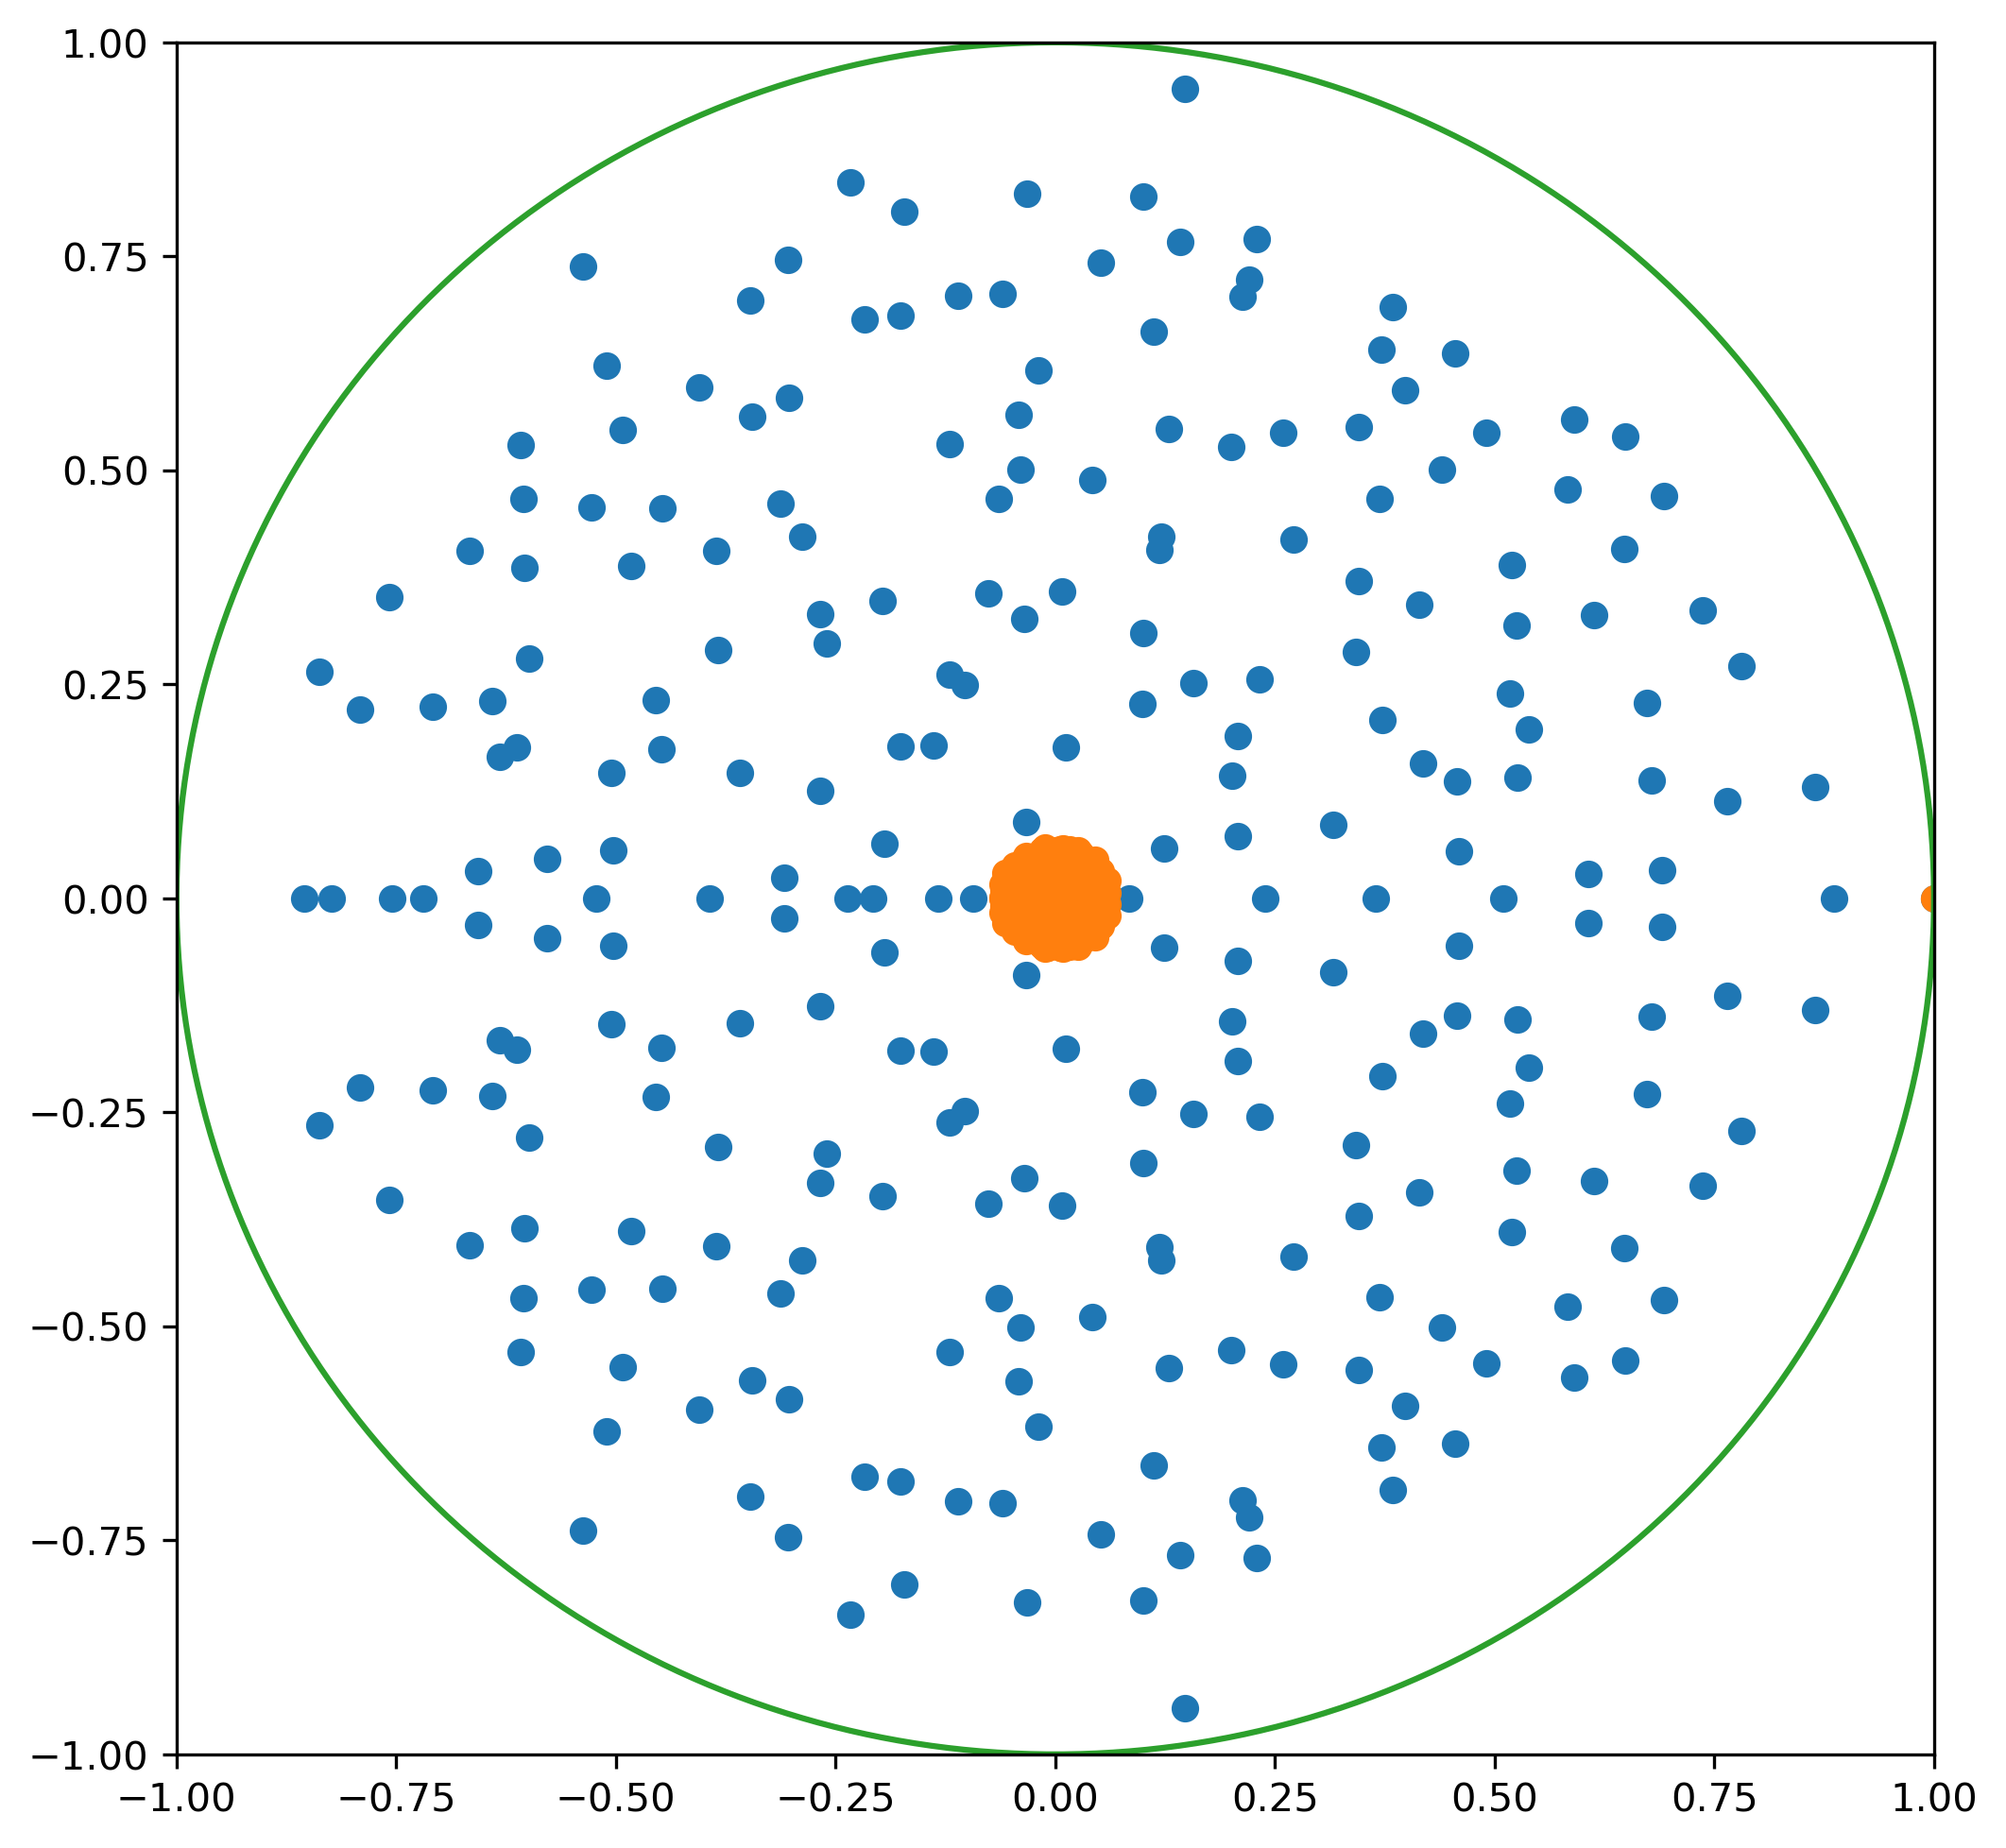

In [2]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

kraus_target = KrausMap(d = d, 
                        rank = d**2,
                        )

kraus_model = KrausMap(d = d, 
                       rank = d**2,
                      )

choi_target1 = maps_to_choi([kraus_target])
choi_model1 = maps_to_choi([kraus_model])

spectrum_target = choi_spectrum(choi_target1)
spectrum_model = choi_spectrum(choi_model1)

spectrum_target = 14*spectrum_target.numpy()
spectrum_target[-1,0] = 1
spectrum_target[-1,1] = 0

spectrum_target = tf.convert_to_tensor(spectrum_target)

t = np.linspace(0, 2*np.pi, 1000)
circle = [np.sin(t), np.cos(t)]

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(spectrum_target[:,0], spectrum_target[:,1], "o")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "o")
plt.plot(*circle)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

In [3]:
model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = SpectrumDistance(sigma=0.25),
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

  0%|          | 0/1 [00:00<?, ?it/s]

54321.052764658234 0


  0%|          | 0/1 [00:00<?, ?it/s]

54030.78678738713 0


  0%|          | 0/1 [00:00<?, ?it/s]

53782.026500058455 0


  0%|          | 0/1 [00:00<?, ?it/s]

53544.95592468152 0


  0%|          | 0/1 [00:00<?, ?it/s]

53314.73535958493 0


  0%|          | 0/1 [00:00<?, ?it/s]

53088.82351275066 0


  0%|          | 0/1 [00:00<?, ?it/s]

52865.859878148236 0


  0%|          | 0/1 [00:00<?, ?it/s]

52644.97925186636 0


  0%|          | 0/1 [00:00<?, ?it/s]

52425.53930163742 0


  0%|          | 0/1 [00:00<?, ?it/s]

52207.02103709682 0


  0%|          | 0/1 [00:00<?, ?it/s]

51988.92386978896 0


  0%|          | 0/1 [00:00<?, ?it/s]

51770.89006164759 0


  0%|          | 0/1 [00:00<?, ?it/s]

51552.781789532804 0


  0%|          | 0/1 [00:00<?, ?it/s]

51334.310172058154 0


  0%|          | 0/1 [00:00<?, ?it/s]

51115.323468047485 0


  0%|          | 0/1 [00:00<?, ?it/s]

50895.61299798275 0


  0%|          | 0/1 [00:00<?, ?it/s]

50674.96038604852 0


  0%|          | 0/1 [00:00<?, ?it/s]

50453.20973068339 0


  0%|          | 0/1 [00:00<?, ?it/s]

50230.3038668892 0


  0%|          | 0/1 [00:00<?, ?it/s]

50005.953873823026 0


  0%|          | 0/1 [00:00<?, ?it/s]

49779.939192005855 0


  0%|          | 0/1 [00:00<?, ?it/s]

49552.239323863505 0


  0%|          | 0/1 [00:00<?, ?it/s]

49322.70737233739 0


  0%|          | 0/1 [00:00<?, ?it/s]

49091.29115589462 0


  0%|          | 0/1 [00:00<?, ?it/s]

48857.93551135553 0


  0%|          | 0/1 [00:00<?, ?it/s]

48622.43722729094 0


  0%|          | 0/1 [00:00<?, ?it/s]

48384.727491882644 0


  0%|          | 0/1 [00:00<?, ?it/s]

48144.664028163104 0


  0%|          | 0/1 [00:00<?, ?it/s]

47902.08102803575 0


  0%|          | 0/1 [00:00<?, ?it/s]

47656.948209559094 0


  0%|          | 0/1 [00:00<?, ?it/s]

47409.184685550325 0


  0%|          | 0/1 [00:00<?, ?it/s]

47158.72721284309 0


  0%|          | 0/1 [00:00<?, ?it/s]

46905.3988134316 0


  0%|          | 0/1 [00:00<?, ?it/s]

46649.001783925516 0


  0%|          | 0/1 [00:00<?, ?it/s]

46389.48621321819 0


  0%|          | 0/1 [00:00<?, ?it/s]

46126.65439191698 0


  0%|          | 0/1 [00:00<?, ?it/s]

45860.47333761503 0


  0%|          | 0/1 [00:00<?, ?it/s]

45590.71910878536 0


  0%|          | 0/1 [00:00<?, ?it/s]

45317.41035964273 0


  0%|          | 0/1 [00:00<?, ?it/s]

45040.378136265324 0


  0%|          | 0/1 [00:00<?, ?it/s]

44759.63117556563 0


  0%|          | 0/1 [00:00<?, ?it/s]

44474.99449263107 0


  0%|          | 0/1 [00:00<?, ?it/s]

44186.40425182712 0


  0%|          | 0/1 [00:00<?, ?it/s]

43893.85151271653 0


  0%|          | 0/1 [00:00<?, ?it/s]

43597.085571141506 0


  0%|          | 0/1 [00:00<?, ?it/s]

43296.04469512607 0


  0%|          | 0/1 [00:00<?, ?it/s]

42990.763183107956 0


  0%|          | 0/1 [00:00<?, ?it/s]

42681.08726083136 0


  0%|          | 0/1 [00:00<?, ?it/s]

42367.034841865425 0


  0%|          | 0/1 [00:00<?, ?it/s]

42048.42216687562 0


  0%|          | 0/1 [00:00<?, ?it/s]

41725.072330988565 0


  0%|          | 0/1 [00:00<?, ?it/s]

41396.997305028526 0


  0%|          | 0/1 [00:00<?, ?it/s]

41064.22272482955 0


  0%|          | 0/1 [00:00<?, ?it/s]

40726.60436765366 0


  0%|          | 0/1 [00:00<?, ?it/s]

40384.23889732969 0


  0%|          | 0/1 [00:00<?, ?it/s]

40036.98701872223 0


  0%|          | 0/1 [00:00<?, ?it/s]

39684.986668579295 0


  0%|          | 0/1 [00:00<?, ?it/s]

39328.15880866848 0


  0%|          | 0/1 [00:00<?, ?it/s]

38966.361076035304 0


  0%|          | 0/1 [00:00<?, ?it/s]

38599.7446595645 0


  0%|          | 0/1 [00:00<?, ?it/s]

38228.1713971445 0


  0%|          | 0/1 [00:00<?, ?it/s]

37851.58111797637 0


  0%|          | 0/1 [00:00<?, ?it/s]

37469.65459930942 0


  0%|          | 0/1 [00:00<?, ?it/s]

37082.34489001309 0


  0%|          | 0/1 [00:00<?, ?it/s]

36689.646405686944 0


  0%|          | 0/1 [00:00<?, ?it/s]

36291.9207712295 0


  0%|          | 0/1 [00:00<?, ?it/s]

35889.03678507744 0


  0%|          | 0/1 [00:00<?, ?it/s]

35480.477609706664 0


  0%|          | 0/1 [00:00<?, ?it/s]

35066.59772606667 0


  0%|          | 0/1 [00:00<?, ?it/s]

34647.53983838572 0


  0%|          | 0/1 [00:00<?, ?it/s]

34223.16693071913 0


  0%|          | 0/1 [00:00<?, ?it/s]

33793.560741938665 0


  0%|          | 0/1 [00:00<?, ?it/s]

33359.10373711621 0


  0%|          | 0/1 [00:00<?, ?it/s]

32919.58578743327 0


  0%|          | 0/1 [00:00<?, ?it/s]

32475.279589436424 0


  0%|          | 0/1 [00:00<?, ?it/s]

32026.374883705943 0


  0%|          | 0/1 [00:00<?, ?it/s]

31572.782578940212 0


  0%|          | 0/1 [00:00<?, ?it/s]

31114.84897626858 0


  0%|          | 0/1 [00:00<?, ?it/s]

30652.41078306953 0


  0%|          | 0/1 [00:00<?, ?it/s]

30185.639712347438 0


  0%|          | 0/1 [00:00<?, ?it/s]

29714.624791695358 0


  0%|          | 0/1 [00:00<?, ?it/s]

29240.294598426626 0


  0%|          | 0/1 [00:00<?, ?it/s]

28762.554063816744 0


  0%|          | 0/1 [00:00<?, ?it/s]

28281.51055023716 0


  0%|          | 0/1 [00:00<?, ?it/s]

27797.526680268737 0


  0%|          | 0/1 [00:00<?, ?it/s]

27310.96780126115 0


  0%|          | 0/1 [00:00<?, ?it/s]

26822.185742356512 0


  0%|          | 0/1 [00:00<?, ?it/s]

26332.19354912047 0


  0%|          | 0/1 [00:00<?, ?it/s]

25841.014569238774 0


  0%|          | 0/1 [00:00<?, ?it/s]

25349.369629900597 0


  0%|          | 0/1 [00:00<?, ?it/s]

24857.46070325 0


  0%|          | 0/1 [00:00<?, ?it/s]

24366.313488923446 0


  0%|          | 0/1 [00:00<?, ?it/s]

23875.930595357822 0


  0%|          | 0/1 [00:00<?, ?it/s]

23386.554923887048 0


  0%|          | 0/1 [00:00<?, ?it/s]

22898.24503743639 0


  0%|          | 0/1 [00:00<?, ?it/s]

22410.921998800433 0


  0%|          | 0/1 [00:00<?, ?it/s]

21924.235901255524 0


  0%|          | 0/1 [00:00<?, ?it/s]

21438.90421785196 0


  0%|          | 0/1 [00:00<?, ?it/s]

20956.099483237056 0


  0%|          | 0/1 [00:00<?, ?it/s]

20476.750295349673 0


  0%|          | 0/1 [00:00<?, ?it/s]

20001.432188021638 0


  0%|          | 0/1 [00:00<?, ?it/s]

19530.667957547175 0


  0%|          | 0/1 [00:00<?, ?it/s]

19065.432556243642 0


  0%|          | 0/1 [00:00<?, ?it/s]

18605.36906532999 0


  0%|          | 0/1 [00:00<?, ?it/s]

18149.900349570766 0


  0%|          | 0/1 [00:00<?, ?it/s]

17698.87270242563 0


  0%|          | 0/1 [00:00<?, ?it/s]

17252.402739207602 0


  0%|          | 0/1 [00:00<?, ?it/s]

16811.155742602423 0


  0%|          | 0/1 [00:00<?, ?it/s]

16376.017753147153 0


  0%|          | 0/1 [00:00<?, ?it/s]

15946.384625639257 0


  0%|          | 0/1 [00:00<?, ?it/s]

15522.042842606827 0


  0%|          | 0/1 [00:00<?, ?it/s]

15103.250649453492 0


  0%|          | 0/1 [00:00<?, ?it/s]

14690.374698698593 0


  0%|          | 0/1 [00:00<?, ?it/s]

14283.636372880374 0


  0%|          | 0/1 [00:00<?, ?it/s]

13883.651133090749 0


  0%|          | 0/1 [00:00<?, ?it/s]

13490.69156800125 0


  0%|          | 0/1 [00:00<?, ?it/s]

13105.109953337376 0


  0%|          | 0/1 [00:00<?, ?it/s]

12726.802730373973 0


  0%|          | 0/1 [00:00<?, ?it/s]

12355.618181183801 0


  0%|          | 0/1 [00:00<?, ?it/s]

11991.498186537447 0


  0%|          | 0/1 [00:00<?, ?it/s]

11634.264435253499 0


  0%|          | 0/1 [00:00<?, ?it/s]

11283.343315216687 0


  0%|          | 0/1 [00:00<?, ?it/s]

10938.913803698397 0


  0%|          | 0/1 [00:00<?, ?it/s]

10601.254457911476 0


  0%|          | 0/1 [00:00<?, ?it/s]

10270.224668071487 0


  0%|          | 0/1 [00:00<?, ?it/s]

9946.28130889702 0


  0%|          | 0/1 [00:00<?, ?it/s]

9629.63582287304 0


  0%|          | 0/1 [00:00<?, ?it/s]

9319.8640829457 0


  0%|          | 0/1 [00:00<?, ?it/s]

9017.246636412461 0


  0%|          | 0/1 [00:00<?, ?it/s]

8721.403820394084 0


  0%|          | 0/1 [00:00<?, ?it/s]

8431.674983052839 0


  0%|          | 0/1 [00:00<?, ?it/s]

8149.01251182994 0


  0%|          | 0/1 [00:00<?, ?it/s]

7873.213985310409 0


  0%|          | 0/1 [00:00<?, ?it/s]

7603.203498960183 0


  0%|          | 0/1 [00:00<?, ?it/s]

7338.514476118009 0


  0%|          | 0/1 [00:00<?, ?it/s]

7078.769550031855 0


  0%|          | 0/1 [00:00<?, ?it/s]

6823.869483822669 0


  0%|          | 0/1 [00:00<?, ?it/s]

6574.820620029988 0


  0%|          | 0/1 [00:00<?, ?it/s]

6331.853661034807 0


  0%|          | 0/1 [00:00<?, ?it/s]

6094.980110057932 0


  0%|          | 0/1 [00:00<?, ?it/s]

5863.705404058081 0


  0%|          | 0/1 [00:00<?, ?it/s]

5637.449698563345 0


  0%|          | 0/1 [00:00<?, ?it/s]

5416.000393537461 0


  0%|          | 0/1 [00:00<?, ?it/s]

5199.1408684983 0


  0%|          | 0/1 [00:00<?, ?it/s]

4986.262639801977 0


  0%|          | 0/1 [00:00<?, ?it/s]

4777.133194368378 0


  0%|          | 0/1 [00:00<?, ?it/s]

4572.228774756784 0


  0%|          | 0/1 [00:00<?, ?it/s]

4372.792620155193 0


  0%|          | 0/1 [00:00<?, ?it/s]

4178.159791291695 0


  0%|          | 0/1 [00:00<?, ?it/s]

3985.994014818594 0


  0%|          | 0/1 [00:00<?, ?it/s]

3795.5577762687954 0


  0%|          | 0/1 [00:00<?, ?it/s]

3609.4666720979058 0


  0%|          | 0/1 [00:00<?, ?it/s]

3428.934307851361 0


  0%|          | 0/1 [00:00<?, ?it/s]

3254.4968578489297 0


  0%|          | 0/1 [00:00<?, ?it/s]

3086.272568485052 0


  0%|          | 0/1 [00:00<?, ?it/s]

2923.881168183796 0


  0%|          | 0/1 [00:00<?, ?it/s]

2767.6777715747066 0


  0%|          | 0/1 [00:00<?, ?it/s]

2617.529963933872 0


  0%|          | 0/1 [00:00<?, ?it/s]

2472.4403971401352 0


  0%|          | 0/1 [00:00<?, ?it/s]

2331.7255750309578 0


  0%|          | 0/1 [00:00<?, ?it/s]

2196.3441961598382 0


  0%|          | 0/1 [00:00<?, ?it/s]

2066.902135157714 0


  0%|          | 0/1 [00:00<?, ?it/s]

1943.93444845271 0


  0%|          | 0/1 [00:00<?, ?it/s]

1828.03240898472 0


  0%|          | 0/1 [00:00<?, ?it/s]

1719.2199341528612 0


  0%|          | 0/1 [00:00<?, ?it/s]

1617.0146384345317 0


  0%|          | 0/1 [00:00<?, ?it/s]

1521.05627710306 0


  0%|          | 0/1 [00:00<?, ?it/s]

1431.0860620587428 0


  0%|          | 0/1 [00:00<?, ?it/s]

1346.6886684983347 0


  0%|          | 0/1 [00:00<?, ?it/s]

1267.6651034292172 0


  0%|          | 0/1 [00:00<?, ?it/s]

1193.8259904315855 0


  0%|          | 0/1 [00:00<?, ?it/s]

1125.0206608157641 0


  0%|          | 0/1 [00:00<?, ?it/s]

1060.9534718810646 0


  0%|          | 0/1 [00:00<?, ?it/s]

1001.2839623169821 0


  0%|          | 0/1 [00:00<?, ?it/s]

945.6709643662853 0


  0%|          | 0/1 [00:00<?, ?it/s]

893.7462112622543 0


  0%|          | 0/1 [00:00<?, ?it/s]

845.2455007636163 0


  0%|          | 0/1 [00:00<?, ?it/s]

799.9122299161409 0


  0%|          | 0/1 [00:00<?, ?it/s]

757.4594091029921 0


  0%|          | 0/1 [00:00<?, ?it/s]

717.5735442798541 0


  0%|          | 0/1 [00:00<?, ?it/s]

680.0937617598029 0


  0%|          | 0/1 [00:00<?, ?it/s]

644.8615291275582 0


  0%|          | 0/1 [00:00<?, ?it/s]

611.7028947017479 0


  0%|          | 0/1 [00:00<?, ?it/s]

580.4616313267852 0


  0%|          | 0/1 [00:00<?, ?it/s]

550.9976358235854 0


  0%|          | 0/1 [00:00<?, ?it/s]

523.1793635018821 0


  0%|          | 0/1 [00:00<?, ?it/s]

496.8909911018636 0


  0%|          | 0/1 [00:00<?, ?it/s]

472.0363466046183 0


  0%|          | 0/1 [00:00<?, ?it/s]

448.5277214014732 0


  0%|          | 0/1 [00:00<?, ?it/s]

426.281710530433 0


  0%|          | 0/1 [00:00<?, ?it/s]

405.225099063362 0


  0%|          | 0/1 [00:00<?, ?it/s]

385.29215638516143 0


  0%|          | 0/1 [00:00<?, ?it/s]

366.4264629028894 0


  0%|          | 0/1 [00:00<?, ?it/s]

348.5733348791873 0


  0%|          | 0/1 [00:00<?, ?it/s]

331.6778617288019 0


  0%|          | 0/1 [00:00<?, ?it/s]

315.69411985935403 0


  0%|          | 0/1 [00:00<?, ?it/s]

300.5802433085428 0


  0%|          | 0/1 [00:00<?, ?it/s]

286.28283307478887 0


  0%|          | 0/1 [00:00<?, ?it/s]

272.7763876727113 0


  0%|          | 0/1 [00:00<?, ?it/s]

260.0314027012646 0


  0%|          | 0/1 [00:00<?, ?it/s]

248.0125416229257 0


  0%|          | 0/1 [00:00<?, ?it/s]

236.68692292731794 0


  0%|          | 0/1 [00:00<?, ?it/s]

226.0735323607987 0


  0%|          | 0/1 [00:00<?, ?it/s]

216.08892072848175 0


  0%|          | 0/1 [00:00<?, ?it/s]

206.69495026149343 0


  0%|          | 0/1 [00:00<?, ?it/s]

197.85951297923202 0


  0%|          | 0/1 [00:00<?, ?it/s]

189.5516998507046 0


  0%|          | 0/1 [00:00<?, ?it/s]

181.74162702937247 0


  0%|          | 0/1 [00:00<?, ?it/s]

174.39973170389203 0


  0%|          | 0/1 [00:00<?, ?it/s]

167.49716466789505 0


  0%|          | 0/1 [00:00<?, ?it/s]

161.0058234716107 0


  0%|          | 0/1 [00:00<?, ?it/s]

154.8987546867429 0


  0%|          | 0/1 [00:00<?, ?it/s]

149.1504518340953 0


  0%|          | 0/1 [00:00<?, ?it/s]

143.73688116351332 0


  0%|          | 0/1 [00:00<?, ?it/s]

138.6355630696071 0


  0%|          | 0/1 [00:00<?, ?it/s]

133.82791050453307 0


  0%|          | 0/1 [00:00<?, ?it/s]

129.3081278589707 0


  0%|          | 0/1 [00:00<?, ?it/s]

125.07376120782465 0


  0%|          | 0/1 [00:00<?, ?it/s]

121.0819133640307 0


  0%|          | 0/1 [00:00<?, ?it/s]

117.30268744003843 0


  0%|          | 0/1 [00:00<?, ?it/s]

113.71909127450999 0


  0%|          | 0/1 [00:00<?, ?it/s]

110.31710100337659 0


  0%|          | 0/1 [00:00<?, ?it/s]

107.08395677174485 0


  0%|          | 0/1 [00:00<?, ?it/s]

104.0078702861083 0


  0%|          | 0/1 [00:00<?, ?it/s]

101.07831014153453 0


  0%|          | 0/1 [00:00<?, ?it/s]

98.28547024554427 0


  0%|          | 0/1 [00:00<?, ?it/s]

95.6206391144442 0


  0%|          | 0/1 [00:00<?, ?it/s]

93.07270742941728 0


  0%|          | 0/1 [00:00<?, ?it/s]

90.63534923420048 0


  0%|          | 0/1 [00:00<?, ?it/s]

88.30310264448235 0


  0%|          | 0/1 [00:00<?, ?it/s]

86.0701329995918 0


  0%|          | 0/1 [00:00<?, ?it/s]

83.92587477928646 0


  0%|          | 0/1 [00:00<?, ?it/s]

81.86014753417658 0


  0%|          | 0/1 [00:00<?, ?it/s]

79.87858640747072 0


  0%|          | 0/1 [00:00<?, ?it/s]

77.97773805920951 0


  0%|          | 0/1 [00:00<?, ?it/s]

76.154525310596 0


  0%|          | 0/1 [00:00<?, ?it/s]

74.40600020649435 0


  0%|          | 0/1 [00:00<?, ?it/s]

72.72935651285843 0


  0%|          | 0/1 [00:00<?, ?it/s]

71.12198996529696 0


  0%|          | 0/1 [00:00<?, ?it/s]

69.58135014592335 0


  0%|          | 0/1 [00:00<?, ?it/s]

68.10491991225899 0


  0%|          | 0/1 [00:00<?, ?it/s]

66.69035229010296 0


  0%|          | 0/1 [00:00<?, ?it/s]

65.33528754236977 0


  0%|          | 0/1 [00:00<?, ?it/s]

64.03739646412214 0


  0%|          | 0/1 [00:00<?, ?it/s]

62.79438458653385 0


  0%|          | 0/1 [00:00<?, ?it/s]

61.60399119389149 0


  0%|          | 0/1 [00:00<?, ?it/s]

60.46399148366072 0


  0%|          | 0/1 [00:00<?, ?it/s]

59.37220613059071 0


  0%|          | 0/1 [00:00<?, ?it/s]

58.3264882004878 0


  0%|          | 0/1 [00:00<?, ?it/s]

57.324741069913216 0


  0%|          | 0/1 [00:00<?, ?it/s]

56.36492399611416 0


  0%|          | 0/1 [00:00<?, ?it/s]

55.44505633220433 0


  0%|          | 0/1 [00:00<?, ?it/s]

54.5632253083113 0


  0%|          | 0/1 [00:00<?, ?it/s]

53.717601924745395 0


  0%|          | 0/1 [00:00<?, ?it/s]

52.90643990935132 0


  0%|          | 0/1 [00:00<?, ?it/s]

52.126820532959755 0


  0%|          | 0/1 [00:00<?, ?it/s]

51.37837274961021 0


  0%|          | 0/1 [00:00<?, ?it/s]

50.66033610928571 0


  0%|          | 0/1 [00:00<?, ?it/s]

49.97128299418182 0


  0%|          | 0/1 [00:00<?, ?it/s]

49.30938046364827 0


  0%|          | 0/1 [00:00<?, ?it/s]

48.67286592801793 0


  0%|          | 0/1 [00:00<?, ?it/s]

48.06023670485047 0


  0%|          | 0/1 [00:00<?, ?it/s]

47.4701375954719 0


  0%|          | 0/1 [00:00<?, ?it/s]

46.90131069407289 0


  0%|          | 0/1 [00:00<?, ?it/s]

46.352574999089484 0


  0%|          | 0/1 [00:00<?, ?it/s]

45.82280530664502 0


  0%|          | 0/1 [00:00<?, ?it/s]

45.310936530295294 0


  0%|          | 0/1 [00:00<?, ?it/s]

44.8159587466962 0


  0%|          | 0/1 [00:00<?, ?it/s]

44.33668391590072 0


  0%|          | 0/1 [00:00<?, ?it/s]

43.87235869045071 0


  0%|          | 0/1 [00:00<?, ?it/s]

43.42218237509951 0


  0%|          | 0/1 [00:00<?, ?it/s]

42.985353712994765 0


  0%|          | 0/1 [00:00<?, ?it/s]

42.56111943585347 0


  0%|          | 0/1 [00:00<?, ?it/s]

42.14877263780909 0


  0%|          | 0/1 [00:00<?, ?it/s]

41.747651397408845 0


  0%|          | 0/1 [00:00<?, ?it/s]

41.35713540767756 0


  0%|          | 0/1 [00:00<?, ?it/s]

40.97664485388668 0


  0%|          | 0/1 [00:00<?, ?it/s]

40.605638098140844 0


  0%|          | 0/1 [00:00<?, ?it/s]

40.24360811243605 0


  0%|          | 0/1 [00:00<?, ?it/s]

39.89008105562607 0


  0%|          | 0/1 [00:00<?, ?it/s]

39.54461215090305 0


  0%|          | 0/1 [00:00<?, ?it/s]

39.20678830718862 0


  0%|          | 0/1 [00:00<?, ?it/s]

38.87622032478794 0


  0%|          | 0/1 [00:00<?, ?it/s]

38.55254011556826 0


  0%|          | 0/1 [00:00<?, ?it/s]

38.23540485520971 0


  0%|          | 0/1 [00:00<?, ?it/s]

37.9244869437498 0


  0%|          | 0/1 [00:00<?, ?it/s]

37.619394167228165 0


  0%|          | 0/1 [00:00<?, ?it/s]

37.31975498871179 0


  0%|          | 0/1 [00:00<?, ?it/s]

37.02536485614655 0


  0%|          | 0/1 [00:00<?, ?it/s]

36.735858041996835 0


  0%|          | 0/1 [00:00<?, ?it/s]

36.4508859194284 0


  0%|          | 0/1 [00:00<?, ?it/s]

36.17508269028622 0


  0%|          | 0/1 [00:00<?, ?it/s]

35.904271674682604 0


  0%|          | 0/1 [00:00<?, ?it/s]

35.63713321587238 0


  0%|          | 0/1 [00:00<?, ?it/s]

35.37370792744696 0


  0%|          | 0/1 [00:00<?, ?it/s]

35.11394274050326 0


  0%|          | 0/1 [00:00<?, ?it/s]

34.85773958536265 0


  0%|          | 0/1 [00:00<?, ?it/s]

34.60496091606001 0


  0%|          | 0/1 [00:00<?, ?it/s]

34.35540597162799 0


  0%|          | 0/1 [00:00<?, ?it/s]

34.10884946491569 0


  0%|          | 0/1 [00:00<?, ?it/s]

33.868123475127504 0


  0%|          | 0/1 [00:00<?, ?it/s]

33.631810668210164 0


  0%|          | 0/1 [00:00<?, ?it/s]

33.398051657251926 0


  0%|          | 0/1 [00:00<?, ?it/s]

33.166967155528255 0


  0%|          | 0/1 [00:00<?, ?it/s]

32.93854415806709 0


  0%|          | 0/1 [00:00<?, ?it/s]

32.71391029323058 0


  0%|          | 0/1 [00:00<?, ?it/s]

32.492318919934405 0


  0%|          | 0/1 [00:00<?, ?it/s]

32.27344733578684 0


  0%|          | 0/1 [00:00<?, ?it/s]

32.05721415727021 0


  0%|          | 0/1 [00:00<?, ?it/s]

31.84355254391994 0


  0%|          | 0/1 [00:00<?, ?it/s]

31.63240574327574 0


  0%|          | 0/1 [00:00<?, ?it/s]

31.42373618998863 0


  0%|          | 0/1 [00:00<?, ?it/s]

31.217513031702765 0


  0%|          | 0/1 [00:00<?, ?it/s]

31.013706759991692 0


  0%|          | 0/1 [00:00<?, ?it/s]

30.812285419528052 0


  0%|          | 0/1 [00:00<?, ?it/s]

30.613216845300485 0


  0%|          | 0/1 [00:00<?, ?it/s]

30.41646573347134 0


  0%|          | 0/1 [00:00<?, ?it/s]

30.221995401176173 0


  0%|          | 0/1 [00:00<?, ?it/s]

30.030415991592236 0


  0%|          | 0/1 [00:00<?, ?it/s]

29.84095033820995 0


  0%|          | 0/1 [00:00<?, ?it/s]

29.653378362361764 0


  0%|          | 0/1 [00:00<?, ?it/s]

29.467713660202207 0


  0%|          | 0/1 [00:00<?, ?it/s]

29.28409748179547 0


  0%|          | 0/1 [00:00<?, ?it/s]

29.103168800833373 0


  0%|          | 0/1 [00:00<?, ?it/s]

28.924302813500617 0


  0%|          | 0/1 [00:00<?, ?it/s]

28.747488425677147 0


  0%|          | 0/1 [00:00<?, ?it/s]

28.572713616335022 0


  0%|          | 0/1 [00:00<?, ?it/s]

28.39996585991139 0


  0%|          | 0/1 [00:00<?, ?it/s]

28.229229825134098 0


  0%|          | 0/1 [00:00<?, ?it/s]

28.061033491514536 0


  0%|          | 0/1 [00:00<?, ?it/s]

27.894652820090414 0


  0%|          | 0/1 [00:00<?, ?it/s]

27.73001696110805 0


  0%|          | 0/1 [00:00<?, ?it/s]

27.567127106522094 0


  0%|          | 0/1 [00:00<?, ?it/s]

27.406617594437193 0


  0%|          | 0/1 [00:00<?, ?it/s]

27.247900491420296 0


  0%|          | 0/1 [00:00<?, ?it/s]

27.09093540646245 0


  0%|          | 0/1 [00:00<?, ?it/s]

26.936063859006026 0


  0%|          | 0/1 [00:00<?, ?it/s]

26.782795225728478 0


  0%|          | 0/1 [00:00<?, ?it/s]

26.631057777014576 0


  0%|          | 0/1 [00:00<?, ?it/s]

26.481429890007348 0


  0%|          | 0/1 [00:00<?, ?it/s]

26.33345164039929 0


  0%|          | 0/1 [00:00<?, ?it/s]

26.186996869810173 0


  0%|          | 0/1 [00:00<?, ?it/s]

26.04203833520114 0


  0%|          | 0/1 [00:00<?, ?it/s]

25.898662854919166 0


  0%|          | 0/1 [00:00<?, ?it/s]

25.757204134784843 0


  0%|          | 0/1 [00:00<?, ?it/s]

25.61713866250102 0


  0%|          | 0/1 [00:00<?, ?it/s]

25.4787911411986 0


  0%|          | 0/1 [00:00<?, ?it/s]

25.341954621180776 0


  0%|          | 0/1 [00:00<?, ?it/s]

25.20640814642138 0


  0%|          | 0/1 [00:00<?, ?it/s]

25.0729064652769 0


  0%|          | 0/1 [00:00<?, ?it/s]

24.940689170420228 0


  0%|          | 0/1 [00:00<?, ?it/s]

24.80975869838221 0


  0%|          | 0/1 [00:00<?, ?it/s]

24.680121365012383 0


  0%|          | 0/1 [00:00<?, ?it/s]

24.551781295369437 0


  0%|          | 0/1 [00:00<?, ?it/s]

24.425738147925586 0


  0%|          | 0/1 [00:00<?, ?it/s]

24.30073391203223 0


  0%|          | 0/1 [00:00<?, ?it/s]

24.176707139593418 0


  0%|          | 0/1 [00:00<?, ?it/s]

24.053609959488313 0


  0%|          | 0/1 [00:00<?, ?it/s]

23.93266884908917 0


  0%|          | 0/1 [00:00<?, ?it/s]

23.81303540616318 0


  0%|          | 0/1 [00:00<?, ?it/s]

23.69449874831662 0


  0%|          | 0/1 [00:00<?, ?it/s]

23.577062581756763 0


  0%|          | 0/1 [00:00<?, ?it/s]

23.460728651434692 0


  0%|          | 0/1 [00:00<?, ?it/s]

23.34549590501956 0


  0%|          | 0/1 [00:00<?, ?it/s]

23.23136025781423 0


  0%|          | 0/1 [00:00<?, ?it/s]

23.118355710475953 0


  0%|          | 0/1 [00:00<?, ?it/s]

23.00701443066282 0


  0%|          | 0/1 [00:00<?, ?it/s]

22.89661277936102 0


  0%|          | 0/1 [00:00<?, ?it/s]

22.787465717345185 0


  0%|          | 0/1 [00:00<?, ?it/s]

22.679297386988765 0


  0%|          | 0/1 [00:00<?, ?it/s]

22.572096077863534 0


  0%|          | 0/1 [00:00<?, ?it/s]

22.466738525687106 0


  0%|          | 0/1 [00:00<?, ?it/s]

22.36163910182586 0


  0%|          | 0/1 [00:00<?, ?it/s]

22.25750462094402 0


  0%|          | 0/1 [00:00<?, ?it/s]

22.154854069205612 0


  0%|          | 0/1 [00:00<?, ?it/s]

22.053032959895063 0


  0%|          | 0/1 [00:00<?, ?it/s]

21.95202812194657 0


  0%|          | 0/1 [00:00<?, ?it/s]

21.85182381338018 0


  0%|          | 0/1 [00:00<?, ?it/s]

21.75276937952367 0


  0%|          | 0/1 [00:00<?, ?it/s]

21.654449581543304 0


  0%|          | 0/1 [00:00<?, ?it/s]

21.55734436881903 0


  0%|          | 0/1 [00:00<?, ?it/s]

21.461305247123164 0


  0%|          | 0/1 [00:00<?, ?it/s]

21.366082029982863 0


  0%|          | 0/1 [00:00<?, ?it/s]

21.271512081213586 0


  0%|          | 0/1 [00:00<?, ?it/s]

21.17758326218427 0


  0%|          | 0/1 [00:00<?, ?it/s]

21.084276796311315 0


  0%|          | 0/1 [00:00<?, ?it/s]

20.993315384561356 0


  0%|          | 0/1 [00:00<?, ?it/s]

20.901590929837766 0


  0%|          | 0/1 [00:00<?, ?it/s]

20.810659206257696 0


  0%|          | 0/1 [00:00<?, ?it/s]

20.721481609181865 0


  0%|          | 0/1 [00:00<?, ?it/s]

20.63287781053623 0


  0%|          | 0/1 [00:00<?, ?it/s]

20.544238914770176 0


  0%|          | 0/1 [00:00<?, ?it/s]

20.455542046454866 0


  0%|          | 0/1 [00:00<?, ?it/s]

20.3715203820866 0


  0%|          | 0/1 [00:00<?, ?it/s]

20.285791250977127 0


  0%|          | 0/1 [00:00<?, ?it/s]

20.19759466574942 0


  0%|          | 0/1 [00:00<?, ?it/s]

20.117825357106994 0


  0%|          | 0/1 [00:00<?, ?it/s]

20.035530048608052 0


  0%|          | 0/1 [00:00<?, ?it/s]

19.9467980728532 0


  0%|          | 0/1 [00:00<?, ?it/s]

19.870501280169265 0


  0%|          | 0/1 [00:00<?, ?it/s]

19.793188749859837 0


  0%|          | 0/1 [00:00<?, ?it/s]

19.712506577829117 0


  0%|          | 0/1 [00:00<?, ?it/s]

19.62900943279783 0


  0%|          | 0/1 [00:00<?, ?it/s]

19.540003702099057 0


  0%|          | 0/1 [00:00<?, ?it/s]

19.472739062755863 0


  0%|          | 0/1 [00:00<?, ?it/s]

19.401631213571818 0


  0%|          | 0/1 [00:00<?, ?it/s]

19.326662297184157 0


  0%|          | 0/1 [00:00<?, ?it/s]

19.24926732727181 0


  0%|          | 0/1 [00:00<?, ?it/s]

19.169536021505337 0


  0%|          | 0/1 [00:00<?, ?it/s]

19.087057123630075 0


  0%|          | 0/1 [00:00<?, ?it/s]

18.999557855142484 0


  0%|          | 0/1 [00:00<?, ?it/s]

18.93359850283923 0


  0%|          | 0/1 [00:00<?, ?it/s]

18.867293369779873 0


  0%|          | 0/1 [00:00<?, ?it/s]

18.797681741900305 0


  0%|          | 0/1 [00:00<?, ?it/s]

18.726263912187278 0


  0%|          | 0/1 [00:00<?, ?it/s]

18.653504835283456 0


  0%|          | 0/1 [00:00<?, ?it/s]

18.579453054449914 0


  0%|          | 0/1 [00:00<?, ?it/s]

18.50371737748719 0


  0%|          | 0/1 [00:00<?, ?it/s]

18.425960950842637 0


  0%|          | 0/1 [00:00<?, ?it/s]

18.352367631528978 0


  0%|          | 0/1 [00:00<?, ?it/s]

18.287197425801423 0


  0%|          | 0/1 [00:00<?, ?it/s]

18.221675001082986 0


  0%|          | 0/1 [00:00<?, ?it/s]

18.151713147517512 0


  0%|          | 0/1 [00:00<?, ?it/s]

18.07689795262013 0


  0%|          | 0/1 [00:00<?, ?it/s]

18.005758091083408 0


  0%|          | 0/1 [00:00<?, ?it/s]

17.94370783182967 0


  0%|          | 0/1 [00:00<?, ?it/s]

17.87443235871615 0


  0%|          | 0/1 [00:00<?, ?it/s]

17.809472071719938 0


  0%|          | 0/1 [00:00<?, ?it/s]

17.745506340093925 0


  0%|          | 0/1 [00:00<?, ?it/s]

17.674067541884142 0


  0%|          | 0/1 [00:00<?, ?it/s]

17.61793396567191 0


  0%|          | 0/1 [00:00<?, ?it/s]

17.553631960476196 0


  0%|          | 0/1 [00:00<?, ?it/s]

17.48329192973688 0


  0%|          | 0/1 [00:00<?, ?it/s]

17.41872394046368 0


  0%|          | 0/1 [00:00<?, ?it/s]

17.358013699520598 0


  0%|          | 0/1 [00:00<?, ?it/s]

17.29567046066768 0


  0%|          | 0/1 [00:00<?, ?it/s]

17.237650672814198 0


  0%|          | 0/1 [00:00<?, ?it/s]

17.177869681005177 0


  0%|          | 0/1 [00:00<?, ?it/s]

17.111862394602213 0


  0%|          | 0/1 [00:00<?, ?it/s]

17.052064172856262 0


  0%|          | 0/1 [00:00<?, ?it/s]

16.99731956724463 0


  0%|          | 0/1 [00:00<?, ?it/s]

16.934895560276345 0


  0%|          | 0/1 [00:00<?, ?it/s]

16.881761612974515 0


  0%|          | 0/1 [00:00<?, ?it/s]

16.826339960247424 0


  0%|          | 0/1 [00:00<?, ?it/s]

16.763738462579568 0


  0%|          | 0/1 [00:00<?, ?it/s]

16.700559435097603 0


  0%|          | 0/1 [00:00<?, ?it/s]

16.643625423906997 0


  0%|          | 0/1 [00:00<?, ?it/s]

16.588001448673822 0


  0%|          | 0/1 [00:00<?, ?it/s]

16.529537039041315 0


  0%|          | 0/1 [00:00<?, ?it/s]

16.47192431694748 0


  0%|          | 0/1 [00:00<?, ?it/s]

16.417651906142055 0


  0%|          | 0/1 [00:00<?, ?it/s]

16.36450971074919 0


  0%|          | 0/1 [00:00<?, ?it/s]

16.312517316588128 0


  0%|          | 0/1 [00:00<?, ?it/s]

16.25483031899421 0


  0%|          | 0/1 [00:00<?, ?it/s]

16.199660633461463 0


  0%|          | 0/1 [00:00<?, ?it/s]

16.143661250442165 0


  0%|          | 0/1 [00:00<?, ?it/s]

16.09621490572681 0


  0%|          | 0/1 [00:00<?, ?it/s]

16.046500354703312 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.990823977581385 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.931901618687334 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.88799753121748 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.840625056842327 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.789287003031859 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.734640059516096 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.674725817969374 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.630761663647718 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.588034267431794 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.539892007127492 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.48768929975995 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.43104455480352 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.373455481052588 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.340031834351976 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.298934080690742 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.254556623278404 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.208185987226898 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.16031424076391 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.111101733062242 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.060449303035057 0


  0%|          | 0/1 [00:00<?, ?it/s]

15.007841146009014 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.95120189829322 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.90772034857764 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.872802932244667 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.832769184860808 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.78923723965454 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.742983553656813 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.694124495092183 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.642181161219924 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.592076381672086 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.552051457081689 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.514836486665445 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.474094268412955 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.431136973904358 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.386234649944527 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.338928317847603 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.29054536934018 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.251940051537531 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.211655333347153 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.170583512406665 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.128905250316166 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.086409916078992 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.044697639579681 0


  0%|          | 0/1 [00:00<?, ?it/s]

14.004158428546361 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.96684915051992 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.92901451592661 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.890237764080666 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.850822074817188 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.81069582802047 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.769534217472028 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.734475420029412 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.69607300892676 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.655901871499736 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.61915805884928 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.580743535840156 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.544544691118062 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.508145196312398 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.471889017166177 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.433631226936996 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.400061849850317 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.36229659784658 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.326970734076895 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.293898998716031 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.259872894504952 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.224733325176203 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.188464865936112 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.154011576427365 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.118993502575904 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.086400796788439 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.054070380047051 0


  0%|          | 0/1 [00:00<?, ?it/s]

13.020701411647678 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.98659863037392 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.951614290985162 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.916848551158182 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.883337516417669 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.85064738609617 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.818402141989282 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.786594675819288 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.754074925935129 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.721517971878711 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.6932044177629 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.661122359440924 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.627398236551016 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.597023457181422 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.564891030855506 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.536037347193997 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.50450552059192 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.473747338783141 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.44613097966976 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.414043372629749 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.382998765388038 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.353651855723001 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.322502062608692 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.293632778199026 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.263004708520384 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.236918286676882 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.207825253155534 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.175194841543998 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.146461224294399 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.120583411460757 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.090402643121706 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.065193695663766 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.038829619466924 0


  0%|          | 0/1 [00:00<?, ?it/s]

12.008842512976116 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.976786272014579 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.949227434755812 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.923697820759116 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.893849767753636 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.869697447758881 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.83998149830768 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.818336683758389 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.794647208427705 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.768196473138232 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.73948491275587 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.709304152571349 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.68312625820181 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.65898511971136 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.63123718850511 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.604435061693948 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.58010052460304 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.554761556790254 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.528717167371724 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.501814112603824 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.47675922030794 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.45141446245907 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.426250864724352 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.402432621162006 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.376435691761799 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.35206493556143 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.326846008034408 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.304537087204153 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.281362942778287 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.254859840957579 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.230858651992094 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.206510728092326 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.184007137686422 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.160919552112318 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.13546954207959 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.115322984507657 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.093398214434274 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.068783583597906 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.04256935610465 0


  0%|          | 0/1 [00:00<?, ?it/s]

11.020648045074267 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.99731004467867 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.974973771993973 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.950225845303066 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.936612944658918 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.919411652439521 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.900287691314588 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.879867358386036 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.858068580584586 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.835007880739795 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.810900086420588 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.785995861853735 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.760107044707183 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.733995356382366 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.714194469474023 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.69660172622207 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.676950958852103 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.655985376761237 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.633926307971706 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.610729473937681 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.585828674687946 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.566055072789823 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.547711388460812 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.528983544319999 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.508877760155883 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.487654983242464 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.465519234256135 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.444111686341785 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.422196522034938 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.40429403078997 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.38630190020558 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.366750537228654 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.345925892521336 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.323502425975676 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.30480418820116 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.286835364959188 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.269041026960622 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.25020995369232 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.230298540873264 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.20975511549841 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.189463184502529 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.169001304348058 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.151033170310257 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.131343082493913 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.112364479731696 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.096207351247358 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.077946306993908 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.057894122795915 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.040532914164942 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.023466718237614 0


  0%|          | 0/1 [00:00<?, ?it/s]

10.005822289704156 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.98697510132115 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.968174799665576 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.948581106018537 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.934543147983277 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.918624655008898 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.901517087630054 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.883499592800945 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.864605937862507 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.844531209932029 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.827208680120748 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.812137932314727 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.796007845263375 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.778857388741017 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.760831795281774 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.742162217791702 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.723844633655972 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.708936737135446 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.693688640412802 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.67731220872156 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.660051214274063 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.641843800029164 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.62435244108201 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.60892877250626 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.5930580554068 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.57694180800172 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.560644572493402 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.544179716318467 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.52750284853937 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.510299617088094 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.496999529623281 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.482402212815941 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.466857126240939 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.450537313523455 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.433376438273626 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.416306030097985 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.402074193081717 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.386881362017448 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.370511708004415 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.354218977759956 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.340724945832335 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.32569476062963 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.30948518588957 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.29490818674094 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.280740318434255 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.265427029406055 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.249591267243886 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.235831859559767 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.221842599608863 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.206913676116528 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.191020560871038 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.177096248351518 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.16392500681468 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.149979480074762 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.135323888689527 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.11998380742807 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.105096440418492 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.091179904002274 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.077750760337949 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.06347589723373 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.048435912423884 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.035142315457051 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.021669145744454 0


  0%|          | 0/1 [00:00<?, ?it/s]

9.007799880931998 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.993805294032427 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.97959120172527 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.966818152261112 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.95370038017063 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.939807173494046 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.925344568713626 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.912232093060084 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.898705324947514 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.886274806918664 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.873130204021436 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.859133655323603 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.84685896179144 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.8335139757437 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.821135614047307 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.808636509833377 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.795366589471087 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.782087053330542 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.769421996978053 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.75694427803137 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.744361797387683 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.73145922479489 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.719180363961641 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.706503844672625 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.694106174401895 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.681601404341563 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.670537821726612 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.65877017603998 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.64639105756396 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.633397203589993 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.621630186044058 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.61024519590137 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.5982991602923 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.585897458713589 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.573278538453451 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.561752806383083 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.550165087390269 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.538191027464563 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.52621017155434 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.51493090069198 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.50344925162426 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.491484594191206 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.479949305537957 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.469025899294138 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.457555482757016 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.445563222243436 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.43453386447436 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.423679693167287 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.412399110062324 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.400759279844351 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.388979689563712 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.378211928205928 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.366973159854751 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.355681496019315 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.34469354263274 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.333668801180465 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.322870932794103 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.31168106707264 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.301284306127855 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.290577751782621 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.279549673234214 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.268423121802698 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.257997337497727 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.247117348544634 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.236601428518043 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.22614901948873 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.215401256124096 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.20458351932757 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.19433970809041 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.183679261743237 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.173395738336694 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.163147685370859 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.152653330325847 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.141972509711195 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.131765306090529 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.121429622084179 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.11117937842937 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.100944070885816 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.090828658938335 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.080742867068693 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.070595540084469 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.060646576868749 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.050574352469994 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.040525192936911 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.030597160903199 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.02051182501782 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.01090118323009 0


  0%|          | 0/1 [00:00<?, ?it/s]

8.00109566700121 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.991074905421556 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.981139942565278 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.971479898047619 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.961689795880375 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.951808795749457 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.94227830114869 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.932679780080434 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.922913470822095 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.913229080488236 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.903751859874319 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.894196811344955 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.884586625186785 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.875072117043601 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.86574014865073 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.856284799750938 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.8467622736461635 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.837409451542044 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.828101977100232 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.818767110526096 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.8094271364861925 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.800152988207628 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.790971232458105 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.781745638822031 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.772518971483805 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.763372383844398 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.7542625842015696 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.7451582449320995 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.736063910377197 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.72700794316188 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.717983832431855 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.7089975458766276 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.70002495945846 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.6910719931875065 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.682155481314112 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.673257791222568 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.6643862088221795 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.655546864270946 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.6467301368647895 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.637932897790961 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.629159528163655 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.620414970211641 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.611696795931493 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.602999845628801 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.594325134547034 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.58567649359793 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.577053263783455 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.568452603709375 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.559873463358599 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.551316882119863 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.5427841420842014 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.534274890142115 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.52578743749109 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.517320925971944 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.508875802075636 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.500452218486316 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.492049381387915 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.483666282803824 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.475302413116879 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.466957836766596 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.4586328204877645 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.45032744414857 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.442041534723103 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.433774915029062 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.425527619834611 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.417299832914068 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.409091686638931 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.400903171252139 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.392734195358571 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.384584687672032 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.376454646851926 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.368344123271527 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.360253167344126 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.352181788828602 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.344129951241484 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.3360975953601155 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.328084667042276 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.320091128385684 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.312116949835399 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.3041620955973485 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.296226515278249 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.288310145780997 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.280412919371884 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.2725347713912925 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.26467564361883 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.256835482812676 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.249014236549556 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.2412118492757145 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.233428260204164 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.2256634035366005 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.217917210184169 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.210189609681038 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.202480531390393 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.194789904784557 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.18711765903754 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.1794637224720645 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.171828022277623 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.164210484699652 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.156611035452443 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.149029600295762 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.141466105462314 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.133920477836 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.126392644919179 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.118882534634395 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.111390075082454 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.103915194313231 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.096457820262003 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.089017880702158 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.081595303345239 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.0741900159137 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.066801946268242 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.059431022482386 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.05207717288431 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.044740326104147 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.037420411059429 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.030117357011477 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.022831093541754 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.015561550600978 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.008308658547321 0


  0%|          | 0/1 [00:00<?, ?it/s]

7.001072348144589 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.993852550596785 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.986649197569932 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.979462221164795 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.972291553913237 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.965137128774586 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.957998879086517 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.950876738565057 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.943770641264564 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.9366805215922795 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.9296063142573985 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.922547954287438 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.915505377010049 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.90847851806393 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.9014673133679025 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.894471699137284 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.887491611863879 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.880526988325073 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.873577765560185 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.866643880854099 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.85972527175727 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.852821876042071 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.84593363170643 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.839060476952 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.8322023501568765 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.825359189891969 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.8185309348555165 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.811717523876723 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.804918895884839 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.798134989867322 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.791365744857103 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.784611099892572 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.777870993975739 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.77114536602312 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.764434154836636 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.757737299045402 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.751054737047525 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.7443864069500705 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.737732246501764 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.731092193005679 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.724466183253753 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.7178541534085525 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.711256038888678 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.704671774272356 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.698101293122818 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.691544527848237 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.684997492171533 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.678439454912223 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.6718916088939295 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.665354157479669 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.658827274406576 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.652311106085108 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.6458057734889735 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.639311373884993 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.63282798216278 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.626355652007987 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.6198944167645095 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.613444290062034 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.607005266201668 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.600577320285083 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.594160408170865 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.5877544661034335 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.581359410283767 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.574975136210924 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.568601517910793 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.562238407252153 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.555885633275466 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.549543001956408 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.543210296420511 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.536887278052745 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.530573688731238 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.524269254643514 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.5179736918016715 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.511686713529343 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.505408039718532 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.499137407463422 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.492874582185323 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.486619368268293 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.4803716178794275 0


  0%|          | 0/1 [00:00<?, ?it/s]

6.474131237038819 0


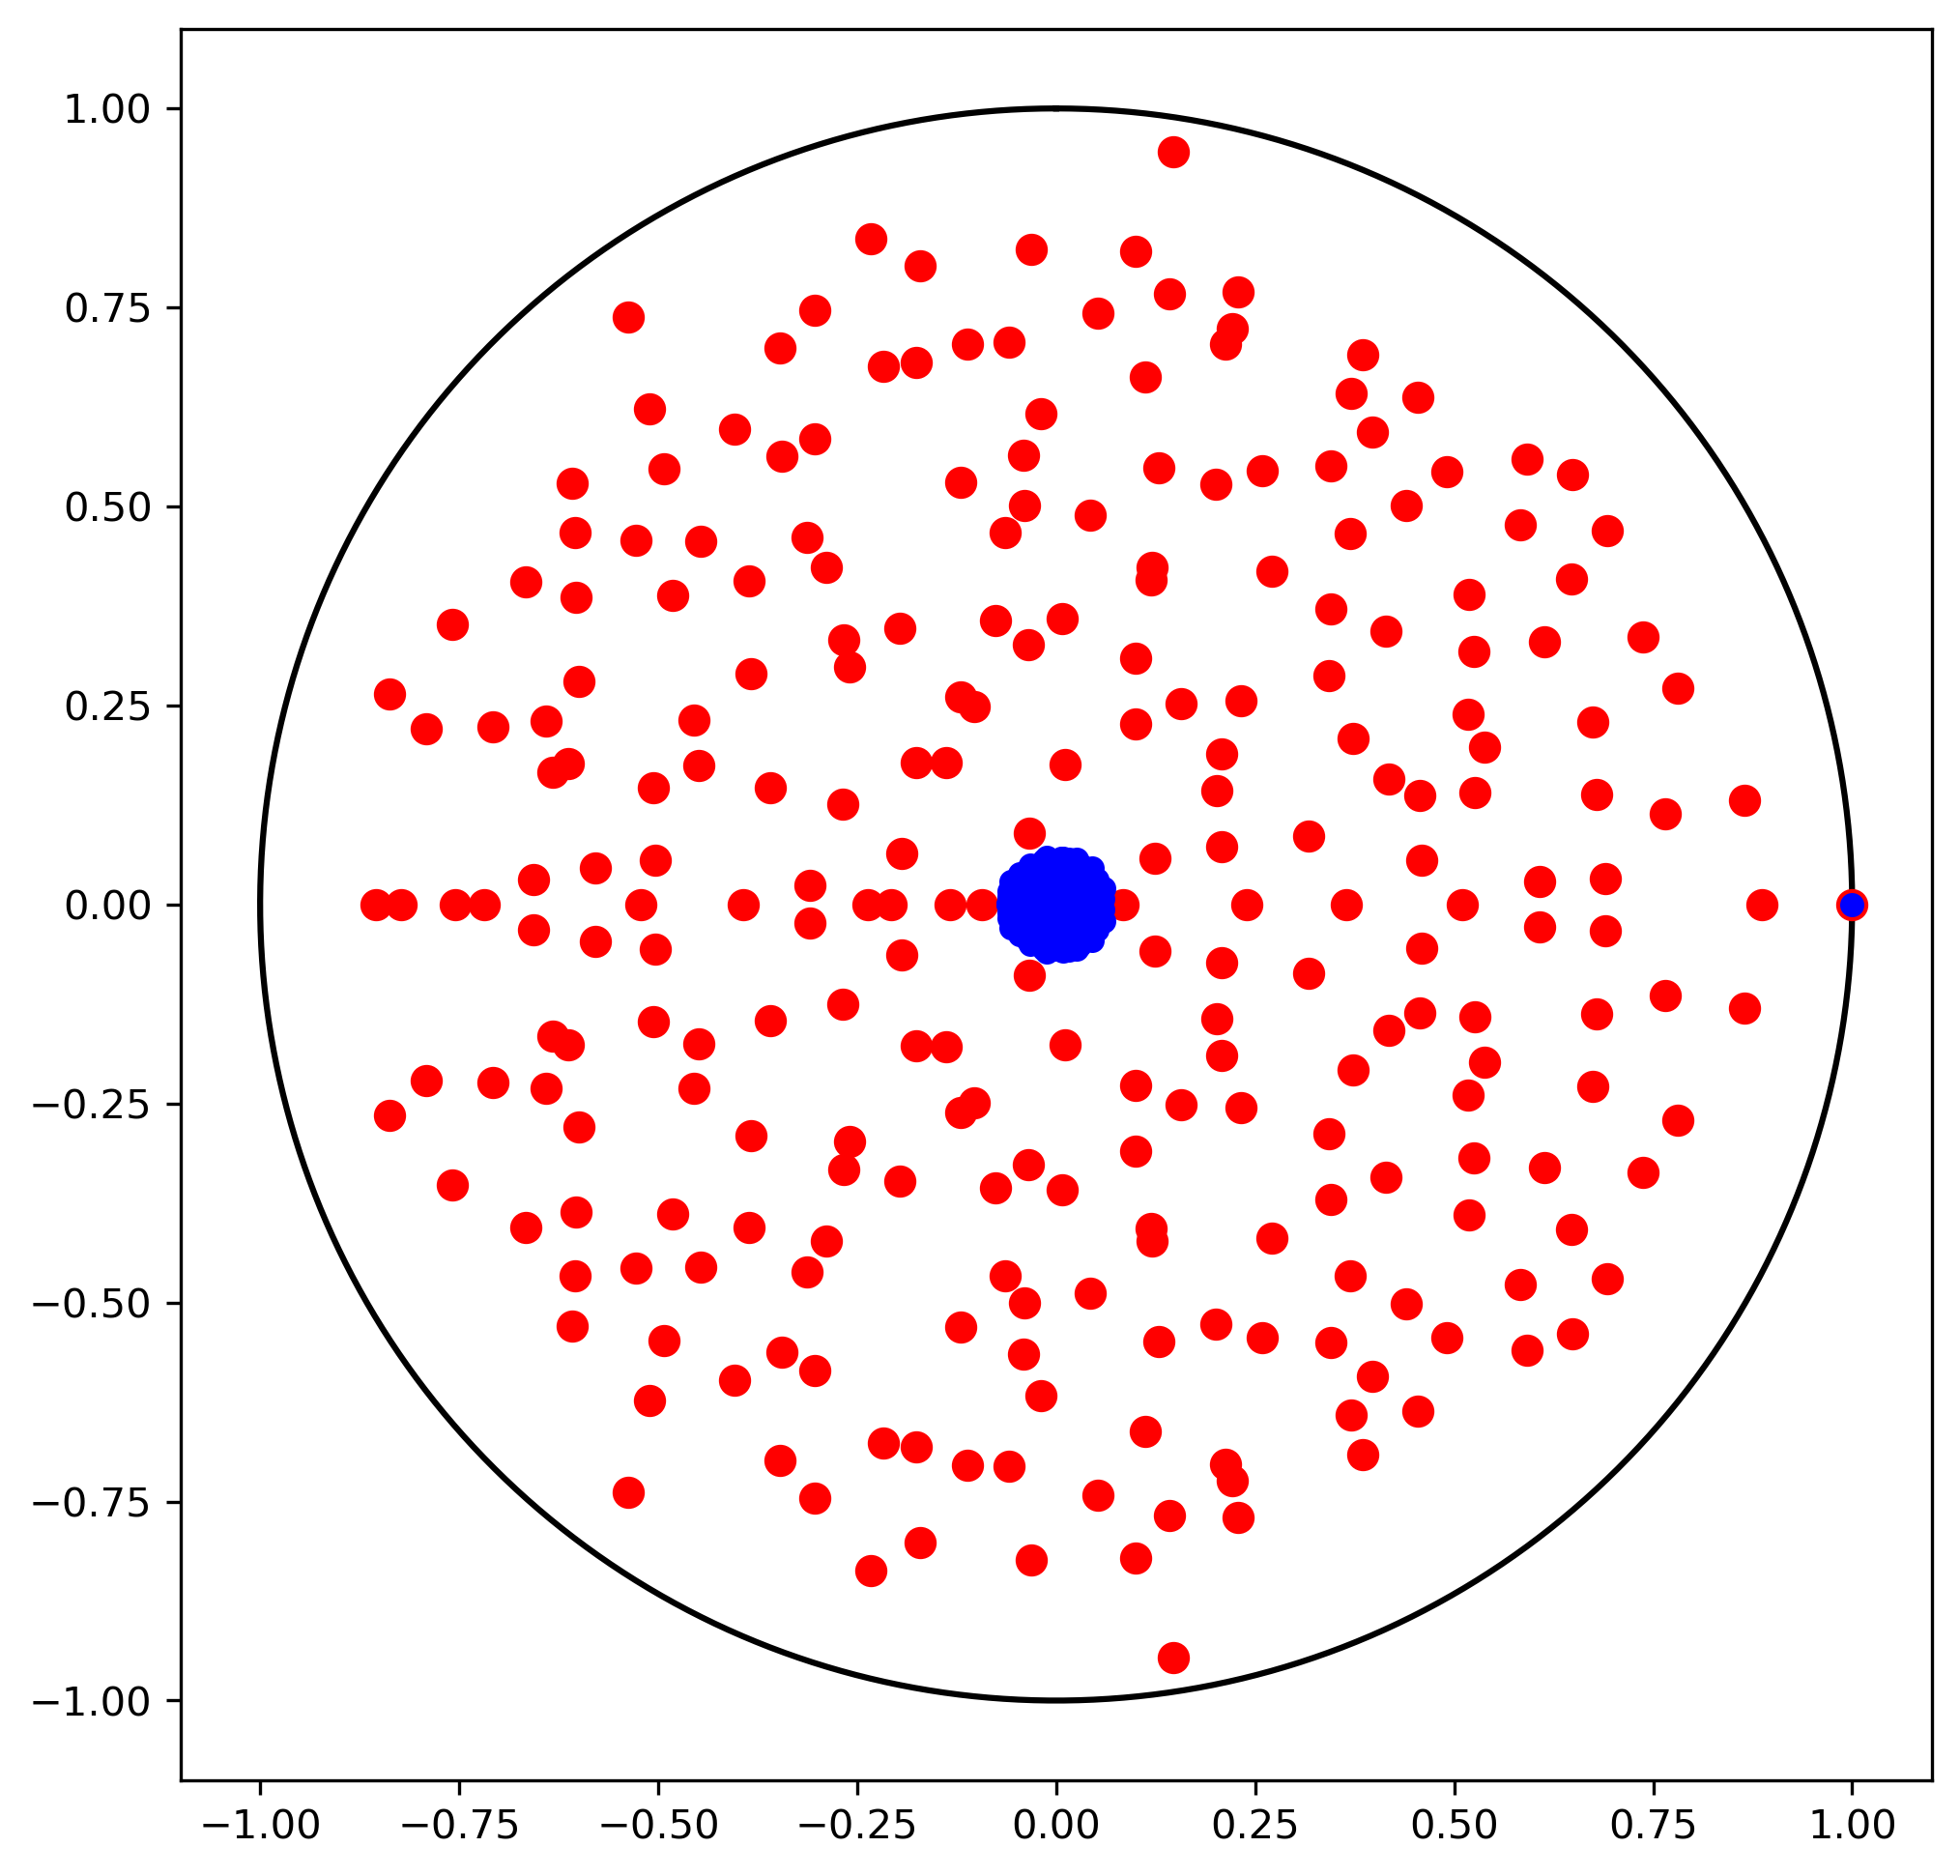

In [4]:
fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k-")

plt.plot(spectrum_target[:,0], spectrum_target[:,1], "ro", markersize = 7)
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "bo", markersize = 5)
fig.savefig(f"spectrum_fig0.png")

for i in range(1, 1000):
    model.train(inputs = [spectrum_target],
                targets = [],
                num_iter = 1,
                N = 1,
                verbose = False,
                use_batch=False)

    spectrum_model = choi_spectrum(maps_to_choi([kraus_model]))
    
    fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    plt.plot(*circle, "k-")
    plt.plot(spectrum_target[:,0], spectrum_target[:,1], "ro", markersize = 7)
    plt.plot(spectrum_model[:,0], spectrum_model[:,1], "bo", markersize = 5)
    fig.savefig(f"spectrum_fig{i}.png")
    plt.close(fig)

In [6]:
from src import *
from PIL import Image
import glob

frames = []
imgs = glob.glob("*.png")
imgs = sorted(imgs, key=lambda name: int(name[12:-4]))

for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
    
frames[0].save('png_to_gif4.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=1, loop=0)